# Imports

In [1]:
import numpy as np
# from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import animation

# import ipywidgets as widgets
# from mpl_toolkits import mplot3d

In [2]:
%matplotlib widget

# Classes

In [3]:
class Wave:

    def __init__(
        self,
        wave_function,
        label,
        weight=1,
    ):
        self.wave_function = wave_function
        self.label = label
        self.weight = weight

    def evaluate_wave_function(self, t, space_lattice):
        return [self.wave_function(x,t) for x in space_lattice]

    def __repr__(self):
        return self.label

In [4]:
def trigonometric_wave_function(phase=0, amplitude=1, time_frequency=1, space_frequency=1):
    return lambda x,t: amplitude * np.sin(phase + x*space_frequency + t*time_frequency)

In [5]:
def plot_superposition(
    waves,
    space_lattice=np.linspace(-10, 10, 200),
    time_lattice=np.linspace(0, 100, 10**3),
):

    def calculate_superposition(t):
        return np.divide(
            np.sum(
                [
                    np.multiply(
                        w.evaluate_wave_function(t, space_lattice),
                        w.weight
                    )
                    for w in waves
                ],
                axis=0),
            len(waves)
        )
    
    fig, all_axes = plt.subplots(
        figsize=(15,3),
        nrows=len(waves)+1,
        # sharex=True,
    )
    painters = [
        all_axes[i].plot(
            space_lattice,
            [wave.wave_function(x,0) for x in space_lattice],
            label=wave.label
        )[0]
        for i, wave in enumerate(waves)
    ]
    for painter in painters:
        painter.set_xdata(space_lattice)

    painters.append(
        all_axes[-1].plot(
            space_lattice,
            calculate_superposition(t=0),
            'tab:orange',
            label="superposition",
        )[0]
    )
    painters[-1].set_xdata(space_lattice)

    for ax in all_axes:
        ax.set(xlim=[-10, 10], ylim=[-1, 1])
        ax.legend(loc='upper right')
    
    def update(frame):
        # update the plots:
        for painter, wave in zip(painters[:-1], waves):
            painter.set_ydata(
                wave.evaluate_wave_function(t=frame, space_lattice=space_lattice)
            )
        painters[-1].set_ydata(calculate_superposition(t=frame))
        return painters
    
    ani = animation.FuncAnimation(
        fig=fig,
        func=update,
        frames=time_lattice,
        interval=5)
    plt.plot()

    return ani

# Goal

Show the "superposition" of a left and right moving wave as a single plot

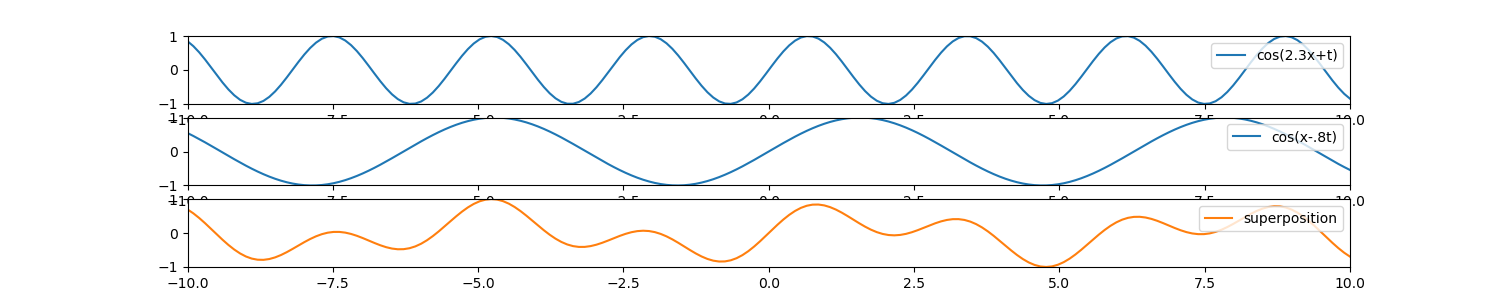

In [6]:
plot_superposition([
    Wave(trigonometric_wave_function(space_frequency=2.3), label="cos(2.3x+t)"),
    Wave(trigonometric_wave_function(time_frequency=-.8), label="cos(x-.8t)"),
])

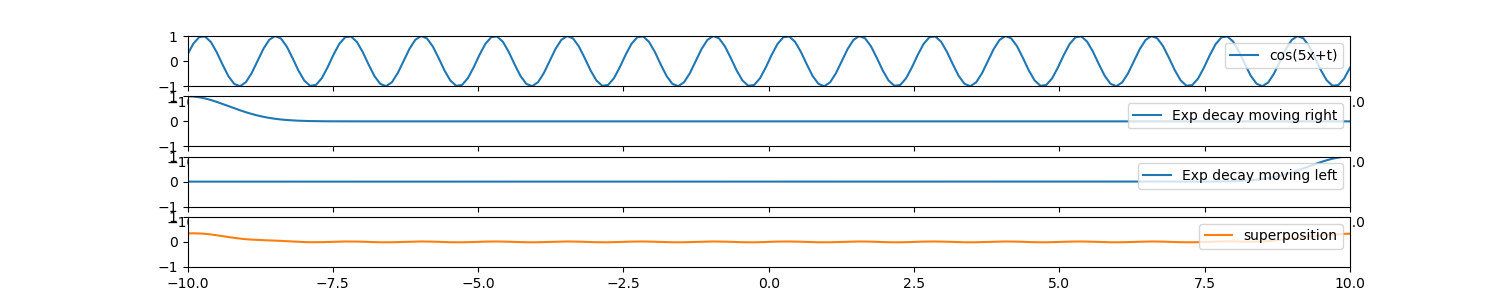

In [7]:
# Show the "superposition" of a left and right moving wave as a single plot
plot_superposition([
    Wave(trigonometric_wave_function(amplitude=1, space_frequency=5), label="cos(5x+t)", weight=.05),
    Wave(lambda x,t: np.exp(-1*(x-.5*t+10)**2), label="Exp decay moving right"),
    Wave(lambda x,t: np.exp(-1*(x+.5*t-10)**2), label="Exp decay moving left"),
], time_lattice=np.linspace(0,20,200))

# Next steps

Use an example as the one below to plot a "3D" curve. This will allows us to see both the complex and real parts of the 1D wave function.

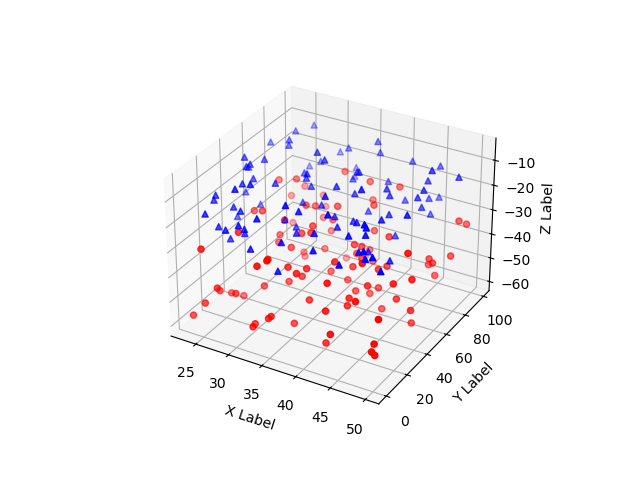

In [8]:
# These lines are comments
# Initial setup from an online python notebook tutorial is below. 
# Note the first line "%matplotlib inline" this is how the tutorial has it.
# Two solutions 1. use: "%matplotlib notebook" graphs appear dynamic in the notebook.
#               2. use: "%matplotlib" (only) graphs appear dynamic in separate window. 
#    ( 2. is the best solution for detailed graphs/plots. )

%matplotlib widget  
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# What follows is a copy of the 3D plot example code.
# Data is randomly generated so there is no external data import.

def randrange(n, vmin, vmax):
    return (vmax-vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 50)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()